In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 30 #with 30 i get 70% accurecy and no overfitting
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator =ImageDataGenerator(rescale=1./255) #Should I write a function for each? It was already like this
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
        train_dir, 
        target_size=(IMG_HEIGHT, IMG_WIDTH),  
        batch_size=batch_size,
        class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(
        validation_dir, 
        target_size=(IMG_HEIGHT, IMG_WIDTH),  
        batch_size=batch_size,
        class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(
        PATH, 
        target_size=(IMG_HEIGHT, IMG_WIDTH),  
        batch_size=batch_size,
        shuffle=False,
        class_mode=None,
        classes=['test']
        )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


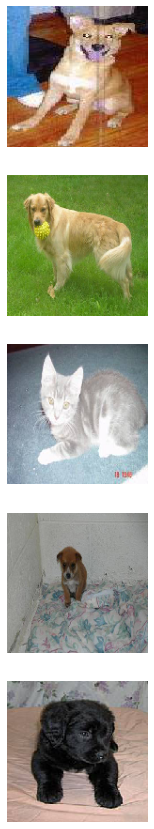

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    rescale=1./255
)


Found 2000 images belonging to 2 classes.


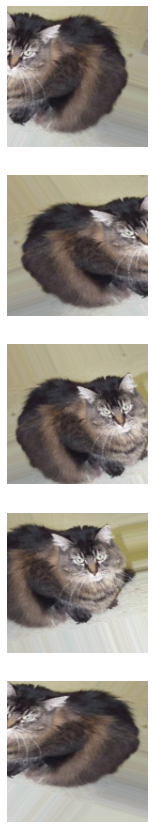

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7

from tensorflow.keras.optimizers import Adam
model = Sequential()

#Convolution Section
model.add( Conv2D(
        16,3,  activation='relu',
        input_shape=(IMG_HEIGHT,IMG_WIDTH,3))
)

model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(
        32,3,  activation='relu',
        input_shape=(IMG_HEIGHT,IMG_WIDTH,3))
)

model.add(MaxPooling2D(pool_size=(2,2)))
#It looks like with two stacks of Conv2D and Maxpooling the maximum accurecy i can get is around 70%, and with 20 epoch it's enough

#DNN Section
model.add(Flatten())

model.add(Dense(32,activation='relu'))

model.add(Dense(1, activation='sigmoid'))

#Compilation

model.compile(
    metrics=['accuracy'],
    optimizer=Adam(),
    loss='binary_crossentropy'
)


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 32)                1

In [ ]:
# 8
history = model.fit( x=train_data_gen, 
          steps_per_epoch= total_train/batch_size,
          epochs=epochs, 
          validation_data=val_data_gen, 
          validation_steps= total_val/batch_size)



Epoch 1/30
15/15 [==============================] - 76s 4s/step - loss: 0.8382 - accuracy: 0.5055 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 2/30
15/15 [==============================] - 66s 4s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 3/30
15/15 [==============================] - 66s 4s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 4/30
15/15 [==============================] - 68s 4s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 5/30
15/15 [==============================] - 66s 4s/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 6/30
15/15 [==============================] - 66s 4s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 7/30
15/15 [==============================] - 73s 5s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 8/30
15/15 [==

In [ ]:
#30 epochs more
history = model.fit( x=train_data_gen, 
          steps_per_epoch= total_train/batch_size,
          epochs=epochs, 
          validation_data=val_data_gen, 
          validation_steps= total_val/batch_size)

Epoch 1/30
15/15 [==============================] - 47s 3s/step - loss: 0.5594 - accuracy: 0.7265 - val_loss: 0.5600 - val_accuracy: 0.7020
Epoch 2/30
15/15 [==============================] - 46s 3s/step - loss: 0.5497 - accuracy: 0.7280 - val_loss: 0.5239 - val_accuracy: 0.7290
Epoch 3/30
15/15 [==============================] - 46s 3s/step - loss: 0.5439 - accuracy: 0.7255 - val_loss: 0.5294 - val_accuracy: 0.7260
Epoch 4/30
15/15 [==============================] - 46s 3s/step - loss: 0.5358 - accuracy: 0.7315 - val_loss: 0.5417 - val_accuracy: 0.7040
Epoch 5/30
15/15 [==============================] - 46s 3s/step - loss: 0.5429 - accuracy: 0.7265 - val_loss: 0.5207 - val_accuracy: 0.7360
Epoch 6/30
15/15 [==============================] - 46s 3s/step - loss: 0.5302 - accuracy: 0.7315 - val_loss: 0.5148 - val_accuracy: 0.7390
Epoch 7/30
15/15 [==============================] - 46s 3s/step - loss: 0.5382 - accuracy: 0.7320 - val_loss: 0.5211 - val_accuracy: 0.7250
Epoch 8/30
15/15 [==

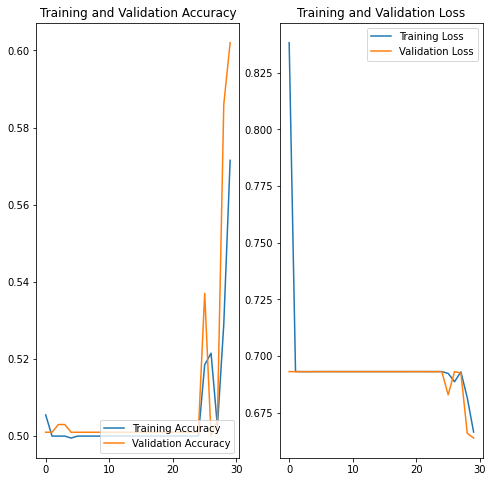

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
probabilities =model.predict(test_data_gen).ravel()
plotImages(test_data_gen[0],probabilities)

1/1 [==============================] - 0s 421ms/step
[0.6483353  0.12826462 0.06733949 0.94513327 0.18379273 0.61337554
 0.6543601  0.09775701 0.50604624 0.96094376 0.0634881  0.39056608
 0.35083583 0.36966375 0.6727157  0.7267232  0.9387898  0.98108757
 0.78085315 0.55137473 0.11309338 0.79891473 0.1398715  0.9275427
 0.52728355 0.37583038 0.8997924  0.20754853 0.2885395  0.674975
 0.31949967 0.09070915 0.97170234 0.9996078  0.05799995 0.57949364
 0.9993477  0.94390243 0.5682967  0.48077333 0.34755436 0.1182683
 0.99419427 0.93375254 0.11489572 0.1783921  0.6880605  0.10737268
 0.58510184 0.21894115]


In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 74.0% of the images of cats and dogs.
You passed the challenge!
